# Twitter Trending Now Analysis

- implementing a clasification of the latest trending  hastags twitter


In [1]:
# add all the import
# these are  the list of imports
%matplotlib inline
# from sklearn
import sklearn
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets, linear_model
from sklearn.cross_validation import KFold    
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split #  this is used for cross validation 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import linear_model
#LOGESTIC REGRESSION
from sklearn.linear_model import LogisticRegression


# THIS IS FOR THE DISPLAY
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

# from pandas
import pandas as pd

#from matplot
import matplotlib.pyplot as plt
import matplotlib 


import json, time, sys, io, pickle,os
import re
import tweepy
import nltk
import numpy as np
import hashlib
import glob
import math

from sklearn.cross_validation import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from decimal import *
from __future__ import division
from matplotlib import pyplot as plt
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from matplotlib.backends.backend_pdf import PdfPages

from collections import Counter
#from matplot
import matplotlib.pyplot as plt
import matplotlib 

# THIS IS FOR THE DISPLAY
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

# from pandas
import pandas as pd

# GETTING DATA FROM TWITTER


In [2]:
# setup the twitter authentication
'''
Configuting the authentication and autherization
'''
access_token = "116405356-cUqC22H0cSHosH8JtzOsgHSJMssKE3LYOyGaCGEt"
access_token_secret = "N4A7CWZjP2xAOW6IQ6NMutTmVPuQJmsMJaOuGkLYfERFw"

consumer_key = "CYj10LtJwmnt45ApZUmX9Wzxh"
consumer_secret = "wkD9EgbNhR8ftV4v2IuZfgngOqrPp0WdKvnBvideVQacOkoFdN"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [3]:
# get tweets of all the trending topics and save it in a file 
##This class uses Tweepy to download tweets from Twitter streaming API
class TweetsListener(tweepy.StreamListener):

    def __init__(self, filename=None, api=None):
        super(TweetsListener, self).__init__()
        self.num_tweets = 0
        self.filename = filename
        
    def on_status(self, status): 
        text = status.text.encode('utf-8').strip().lower()
        if not text.startswith('rt') and not text.startswith('RT'):
            record = {'Text': text, 'Created At': str(status.created_at)}
            if self.num_tweets < 200:
                try:
                    with open(self.filename, 'a') as f:
                        print text
                        pickle.dump(record,f)
                        self.num_tweets += 1
                        return True
                except BaseException as e:
                    print("Error on_status: %s" % str(e))
            else:
                return False
        
    def on_error(self, status):
        print 'Error on status', status

    def on_limit(self, status):
        print 'Limit threshold exceeded', status

    def on_timeout(self, status):
        print 'Stream disconnected; continuing...'

In [23]:
# get all the trending topics
listOfTrendingTopics =[]
twitterAPI_var = tweepy.API(auth)
twitterTrendsAPICall = (twitterAPI_var.trends_place(1))[0]['trends']
for a in twitterTrendsAPICall:
    tempVar = a['name'].encode('utf-8')
    regMatch = re.match( r'#*[(a-z)(A-Z)(1-9)]+', tempVar,0 ) 
    if regMatch !=None:
        listOfTrendingTopics.append(a['name'])

print"LIST OF TRENDING TOPICS:\n",listOfTrendingTopics

LIST OF TRENDING TOPICS:
[u'#ImpeachmentDay', u'Cunha', u'#ElFantasmaDeOriana', u'#PremiosTVyNovelas', u'#MasterChefMx', u'#BuyLetMeLoveYouOniTunes', u'Jean Wyllys', u'Ciro Pertusi', u'Pernambuco', u'Bahia', u'Chris Paul', u'Silvio Santos', u'Tiririca', u'Bruno Ara\xfajo', u'Major Lazer', u'Faust\xe3o', u'TARAKO\u3055\u3093', u'DeAndre Jordan', u'The 1975', u'Tia Eron', u'Audax', u'North Face', u'#bucciovertimechallenge', u'#MacriSA', u'#ComidaChilenaJrMC', u'#ElViejoTruco', u'#EcuadorListoYSolidario', u'#ALDUBGiftOfJoy', u'#PanicoNaBand', u'#FrasesEroticoConfusas', u'#MagandangBuhayKathNiel', u'#rafinhaaovivo', u'#RecentStudiesSuggest', u'#MePoneReDelOrtoQue', u'#FelizCumpleGastonSardelli', u'#ShowtimeLoveLyLunes', u'#NBLPatriciaVoto', u'#JonSecada', u'#ILookAtMyLifeAnd', u'#GraciasColdplay', u'#GirlsHBO', u'#SMTL', u'#DesaparecidosEC', u'#LatenArgentinos', u'#LaCornisa']


In [ ]:
# save each trend in a different file with in the datafolder
for trend in listOfTrendingTopics:
    print "finding tweets for:",str(trend.encode("utf-8"))
    stream = Stream(auth, TweetsListener(filename = 'data/'+trend.encode('utf-8')+'.json'))
    stream.filter(track=[trend],languages=['en'])

finding tweets for: #ImpeachmentDay
winds of change are blowing in #brazil, lawmakers vote for #dilmarousseff's impeachment. #impeachmentday
why would an english hashtag trend in brazil? #impeachmentday  https://t.co/opvdudn2dp

In [5]:
##This method reads all the tweets from the file
def readTweets(filename):
    list = []
    try:
        with open(filename, 'r') as f:
            for a in range(1,1000):
#                 print "a:",a
#                 print pickle.load(f)['Text']
                list.append(pickle.load(f)['Text'])
    except EOFError as e:
        print "error"        
           
    return list        
# readTweets("data/#Amici15.json")

In [6]:
#reads a stopwords from a file and converts it into a list
stopWords = []
def getStopWordList(stopWordListFileName):
    stopWords.append('AT_USER')
    stopWords.append('URL')

    fp = open(stopWordListFileName, 'r')
    line = fp.readline()
    #print line
    while line:
        word = line.strip()
        stopWords.append(word)
        line = fp.readline()
    fp.close()
    return stopWords
stopWords = getStopWordList('categories/stopwords.txt')

In [7]:
'''
takes in tweet/string and 
Params:
        filename........ convert string from file to list
    Return:
    return a list
'''  
def getListFromFile(fileName):
    tempList = []
    fp = open(fileName, 'r')
    line = fp.readline()
    #print line
    while line:
        word = line.strip().lower()
        tempList.append(word)
        line = fp.readline()
    fp.close()
    return tempList

movieList = getListFromFile('categories/movies.txt')
politicsList= getListFromFile('categories/politics.txt')
sportsList = getListFromFile('categories/sports.txt')
technicalList= getListFromFile('categories/technical.txt')
musicList = getListFromFile('categories/music.txt')

#put the list of categories  into a map
listOfCategories={1:movieList,2:politicsList,3:sportsList,4:technicalList,5:musicList}

In [8]:
'''
takes in tweet/string and 
Params:
        tweets........ take in a string process the string
    Return:
    the processed tweets
'''   
def processTweet(tweet):
    # process the tweets
    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
  
    stopWithOr = '|'.join(map(re.escape,stopWords))
    #print type(stopWithOr)
    #tweet = re.sub(r'(the|as)',"",tweet)
    tweet = re.sub(r'\b('+stopWithOr+r')\b','',tweet)    
    tweet = re.sub(r'(\?|\!)','',tweet) 
    tweet = tweet.strip('\'"')
    tweet = tweet.replace("  ", " ")
    tweet = tweet.strip()
    return tweet

# print processTweet("Test:igotceltics  my team! who do you got? nbaplayoffs URL ")

In [9]:
'''
takes in a list and save to a given filename
    Params:
        list.........directory where the file should be saved
        filename.........name of the file to be modified
       
    Return:
    none
'''   
def writeListToTextFile(list,filename):
    f = open(filename, "w")
    for item in list:
        print>>f, item

In [10]:
'''
takes the file from the indir and save it to the outdir  where you remove the unwanted data,stopwords and convert all the 
data to lowercase
    Params:
        indir.........directory where you need to get the files
        outdir.........directory where the file should be saved
        filename.........name of the file to be modified
       
    Return:
       none
'''
def processTweetsAndSave(indir,outdir,filename):
    fp = open(indir+filename, 'r')
    fpn = open(outdir+filename,'w')
    line = fp.readline()
    while line:
        processedTweet = processTweet(line)
        print>>fpn, processedTweet
        line = fp.readline()
    #end loop
    fp.close()

## PRE-PROCESSING THE TWEETS 


In [ ]:
# this is for training data
# for file in os.listdir("data_us"):
#     if file.endswith(".txt"):
#         print file
#         headerName = file.split(".")[0]
#         processTweetsAndSave('data_1_intermidiate/','data_2_processed/',headerName+".txt")

In [12]:
for file in os.listdir("data"):
    if file.endswith(".json"):
        print file
        headerName = file.split(".")[0]
        list_android = readTweets('data/'+file)
        writeListToTextFile(list_android,'data_1_intermidiate/'+headerName+".txt")
        processTweetsAndSave('data_1_intermidiate/','data_2_processed/',headerName+".txt")
                            
        
# list_android = readTweets('#NBAPlayoffs.json')
# writeListToTextFile(list_android,'data_#NBAPlayoffs.txt')
# processTweetsAndSave('data_#NBAPlayoffs.txt')

#Amici15.json
error
#GTLive3.json
error
#ImpeachmentDay.json
error
#MacriSA.json
error
#NBAPlayoffs.json
error
Chelsea.json
error


In [13]:
'''
Takes in a file and finds unique words and its frequency in the document and returna map
this function is mainly used to convert a list of list to a csv file
    Params:
        filename.........file where it needs to be processed
       
    Return:
       Counter that has a map of unique words  with its frequency in the text file
'''
def convertFileeToListToMapOfUniqueWordAndFrequency(fileName):
    tempList = []
    fp = open(fileName, 'r')
    line = fp.readline()
    #print line
    linesInFile = 0
    while line:
        word = line.strip().lower().split()
        tempList.extend(word)
        line = fp.readline()
        linesInFile  =linesInFile+ 1
    fp.close()
    return Counter(tempList),linesInFile

# mapper,noOfLineInAFile = convertFileeToListToMapOfUniqueWordAndFrequency("data_2_processed/#AskRicky.txt")    
# #print "mapper,noOfLineInAFile",mapper,noOfLineInAFile
# uniqueList = list(set(movieList) & set(mapper.keys()))
# #print "uniqueList",uniqueList
# cost = sum([mapper.get(a)for a in uniqueList])
# #print "cost",cost
# #print cost/noOfLineInAFile

In [14]:
'''
takes in a list of list and file to be written to . Each element in the list is joined using a comma saved in the file

this function is mainly used to convert a list of list to a csv file
    Params:
        listOfList......... get the list elements
        filename.........file where it needs to save
       
    Return:
       none
'''
def writeListToTextFileFinalOutput(listOfList,filename):
    f = open(filename, "w")
    for item in listOfList:
        str1 = ','.join(str(e) for e in item)
        print>>f, str1

In [18]:
'''
you take the prepocessed data from the data_2_processed and check the frequency of words from each bucket  that is movies,
politics, technologies,musics

the results of each tag and its associativity with each buckets is saved in finalOutput.txt 

'''
#finalList
finalList = []
#for each file
for file in os.listdir("data_2_processed/"):
    hashTagName = file.split(".")[0]
    
    listOfWordsInfile,noOfLineInAFile = convertFileeToListToMapOfUniqueWordAndFrequency("data_2_processed/"+file)
    
    ##assert(noOfLineInAFile>0 & len(listOfWordsInfile)>0) ## this to check we are not working with empty file
    tempCategoryList = [hashTagName]
    tempCostList = []
    #for each category
    for category in listOfCategories.keys():
        uniqueList = list(set(listOfCategories.get(category)) & set(listOfWordsInfile.keys()))
        cost = sum([listOfWordsInfile.get(a) for a in uniqueList])
        cost = cost/noOfLineInAFile
        tempCategoryList.append(cost)
        tempCostList.append(cost)
        
    tempMaxVal = max(tempCostList)
    index = [i for i, j in enumerate(tempCostList) if j == tempMaxVal][0]
    tempCategoryList.append(index+1)
    finalList.append(tempCategoryList)   
#     print "tempMaxVal",tempMaxVal
#     print "index",index
#     print "tempCategoryList",tempCategoryList
#print "finalList",finalList

writeListToTextFileFinalOutput(finalList,"finalOutput.txt")

# put this to a file

In [19]:
"""
    setData(y_actual_data,y_predicted data)Taking in the actual result and the predicted result in the 
    getMatrics(): this will get back the confussion matrics with the specificity
    Params: 
    - y_test,
    - y_pred_class
    Return:
        returns TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision
"""
class TestMetrics:
    
    def setData(self,y_test,y_pred_class):
            self.y_test = y_test
            self.y_pred_class = y_pred_class
    
    def getMatrics(self):
        confusion = metrics.confusion_matrix(self.y_test, self.y_pred_class)
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]

        Classification_Accuracy = metrics.accuracy_score(self.y_test, self.y_pred_class)
        Classification_Error =  1 - metrics.accuracy_score(self.y_test, self.y_pred_class)
        Sensitivity = TP / float(TP + FN)
        Specificity = TN / float(TN + FP) 
        False_Positive_Rate = FP / float(TN + FP)
        Precision = TP / float(TP + FP)
        return TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision

# Verifying Accuracies

###  Fetching the data from the output file to get the training data

In [20]:
filename = "finalOutput.txt"
X=[]
Y=[]    
with open(filename, "r") as filestream:
    for line in filestream:
        current = line.split(",")
        Y.append(current[len(current)-1].strip())
        X.append([i for i in current[1:len(current)-1]])
X = np.asarray(X).astype(np.float)
Y = np.asarray(Y).astype(np.int)
print Y

[3 5 1 1 3 3 2 4 1 1 2 4 4 1 5 3 3 1 2 3 3 1 1 3 1 1 1 3 1 3 3 1 1 3 3 3 3
 1 1 3 3 3 3 4 3 3 3 3 3 4 1 3 3]


## Logestic Regression :


sklearn
   Accuracy     Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0  0.666667  0.333333   0   1                  0.5       0.75            1   
1  0.333333  0.666667   0   0                  NaN        NaN          NaN   
2  1.000000  0.000000   0   0                  0.0       1.00            1   
3  0.800000  0.200000   0   1                  0.5       0.75            1   
4  0.000000  1.000000   0   0                  NaN        NaN          NaN   

   Specificity  TN  TP  
0          0.5   1   3  
1          NaN   0   0  
2          1.0   1   5  
3          0.5   1   3  
4          NaN   0   0  


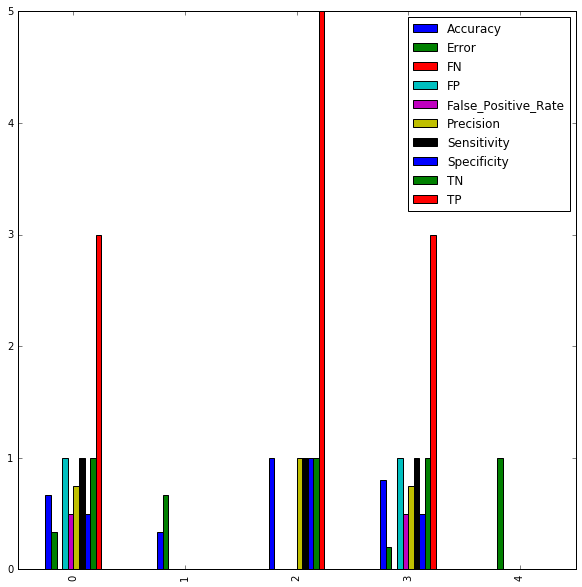

In [21]:
from sklearn.linear_model.logistic import LogisticRegression
import sklearn.metrics

matricsTotal = []
ld_matricsTotal = []
kf = sklearn.cross_validation.KFold(n=len(Y), n_folds=10, shuffle=True,random_state=5)
for train_index, test_index in kf:
    X_train, X_test =np.array([list(X[a]) for a  in train_index]),np.array([list(X[a]) for a  in test_index])
    Y_train, Y_test = [Y[a] for a  in train_index],[Y[a] for a  in test_index]
    #print X_train
    
     ### sklearn test 
    ld_grad =   LogisticRegression()
    ld_grad.fit(X_train,Y_train)
    ld_predicted_Y_values = ld_grad.predict(X_test)
    
    ld_tm  = TestMetrics()
    ld_tm.setData(Y_test,ld_predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  ld_tm.getMatrics()
    ld_matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
 
    
print "sklearn"
ld_df = pd.DataFrame(ld_matricsTotal).head()
ld_df.plot(kind = 'bar',figsize =(10 ,10),stacked = False)
print ld_df

# Multinomial Naive Bayes

sklearn
   Accuracy     Error  FN  FP  False_Positive_Rate  Precision  Sensitivity  \
0  0.500000  0.500000   0   2                    1   0.600000            1   
1  0.333333  0.666667   0   0                  NaN        NaN          NaN   
2  0.833333  0.166667   0   1                    1   0.833333            1   
3  0.600000  0.400000   0   2                    1   0.600000            1   
4  0.000000  1.000000   0   0                  NaN        NaN          NaN   

   Specificity  TN  TP  
0            0   0   3  
1          NaN   0   0  
2            0   0   5  
3            0   0   3  
4          NaN   0   0  


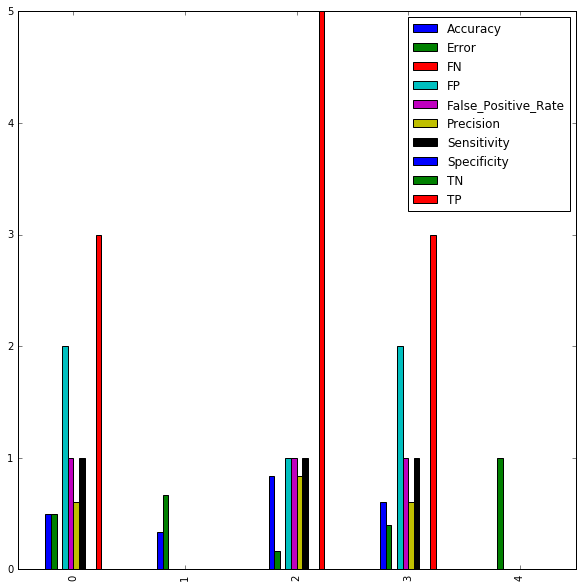

In [22]:
from sklearn.naive_bayes import MultinomialNB

matricsTotal = []
ld_matricsTotal = []
kf = sklearn.cross_validation.KFold(n=len(Y), n_folds=10, shuffle=True,random_state=5)
for train_index, test_index in kf:
    X_train, X_test =np.array([list(X[a]) for a  in train_index]),np.array([list(X[a]) for a  in test_index])
    Y_train, Y_test = [Y[a] for a  in train_index],[Y[a] for a  in test_index]
    #print X_train
    
     ### sklearn test 
    ld_grad =   MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
    ld_grad.fit(X_train,Y_train)
    ld_predicted_Y_values = ld_grad.predict(X_test)
    
    ld_tm  = TestMetrics()
    ld_tm.setData(Y_test,ld_predicted_Y_values)
    TP,TN,FP,FN,Classification_Accuracy,Classification_Error,Sensitivity,Specificity,False_Positive_Rate,Precision =  ld_tm.getMatrics()
    ld_matricsTotal.append({"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Accuracy":Classification_Accuracy,"Error":Classification_Error,"Sensitivity":Sensitivity,"Specificity":Specificity,"False_Positive_Rate":False_Positive_Rate,"Precision":Precision})
 
    
print "sklearn"
ld_df = pd.DataFrame(ld_matricsTotal).head()
ld_df.plot(kind = 'bar',figsize =(10 ,10),stacked = False)
print ld_df